In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# from imblearn.over_sampling import RandomOverSampler

### ***Reading the data***

In [2]:
# Load the dataset with engine specified for .xls files
df = pd.read_csv('creditcard.csv')

# Data exploration
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### ***Data Preprocessing***

###Handle Missing Values:

In [1]:
# Check for missing values
print(df.isnull().sum())

# Impute missing values (if any)
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

NameError: name 'df' is not defined

###Encode Categorical Features skipped because categorical values does not exist

In [14]:
# Example for encoding categorical features
# label_encoder = LabelEncoder()
# df['category_column'] = label_encoder.fit_transform(df['category_column'])

###Check the Range of Values:

In [26]:
# Check the range of values
print(df.min())
print(df.max())

Time      -1.996583
V1       -28.798555
V2       -44.035292
V3       -31.871733
V4        -4.013919
V5       -82.408097
V6       -19.636058
V7       -35.209396
V8       -61.302524
V9       -12.228015
V10      -22.581908
V11       -4.700128
V12      -18.698680
V13       -5.819392
V14      -20.044280
V15       -4.915191
V16      -16.125344
V17      -29.626452
V18      -11.332656
V19       -8.861402
V20      -70.691461
V21      -47.419067
V22      -15.065646
V23      -71.754464
V24       -4.683638
V25      -19.750332
V26       -5.401098
V27      -55.906596
V28      -46.746117
Amount    -0.353229
Class     -0.041599
dtype: float64
Time        1.642058
V1          1.253351
V2         13.357750
V3          6.187993
V4         11.918743
V5         25.214135
V6         55.020149
V7         97.478239
V8         16.751534
V9         14.194945
V10        21.807579
V11        11.775038
V12         7.854679
V13         7.160735
V14        10.981465
V15         9.699117
V16        19.760439
V17     

In [16]:
# Check mean and standard deviation
print(df.mean())
print(df.std())

Time      9.481386e+04
V1        1.168375e-15
V2        3.416908e-16
V3       -1.379537e-15
V4        2.074095e-15
V5        9.604066e-16
V6        1.487313e-15
V7       -5.556467e-16
V8        1.213481e-16
V9       -2.406331e-15
V10       2.239053e-15
V11       1.673327e-15
V12      -1.247012e-15
V13       8.190001e-16
V14       1.207294e-15
V15       4.887456e-15
V16       1.437716e-15
V17      -3.772171e-16
V18       9.564149e-16
V19       1.039917e-15
V20       6.406204e-16
V21       1.654067e-16
V22      -3.568593e-16
V23       2.578648e-16
V24       4.473266e-15
V25       5.340915e-16
V26       1.683437e-15
V27      -3.660091e-16
V28      -1.227390e-16
Amount    8.834962e+01
Class     1.727486e-03
dtype: float64
Time      47488.145955
V1            1.958696
V2            1.651309
V3            1.516255
V4            1.415869
V5            1.380247
V6            1.332271
V7            1.237094
V8            1.194353
V9            1.098632
V10           1.088850
V11           1.020

 ###Normalize Data :

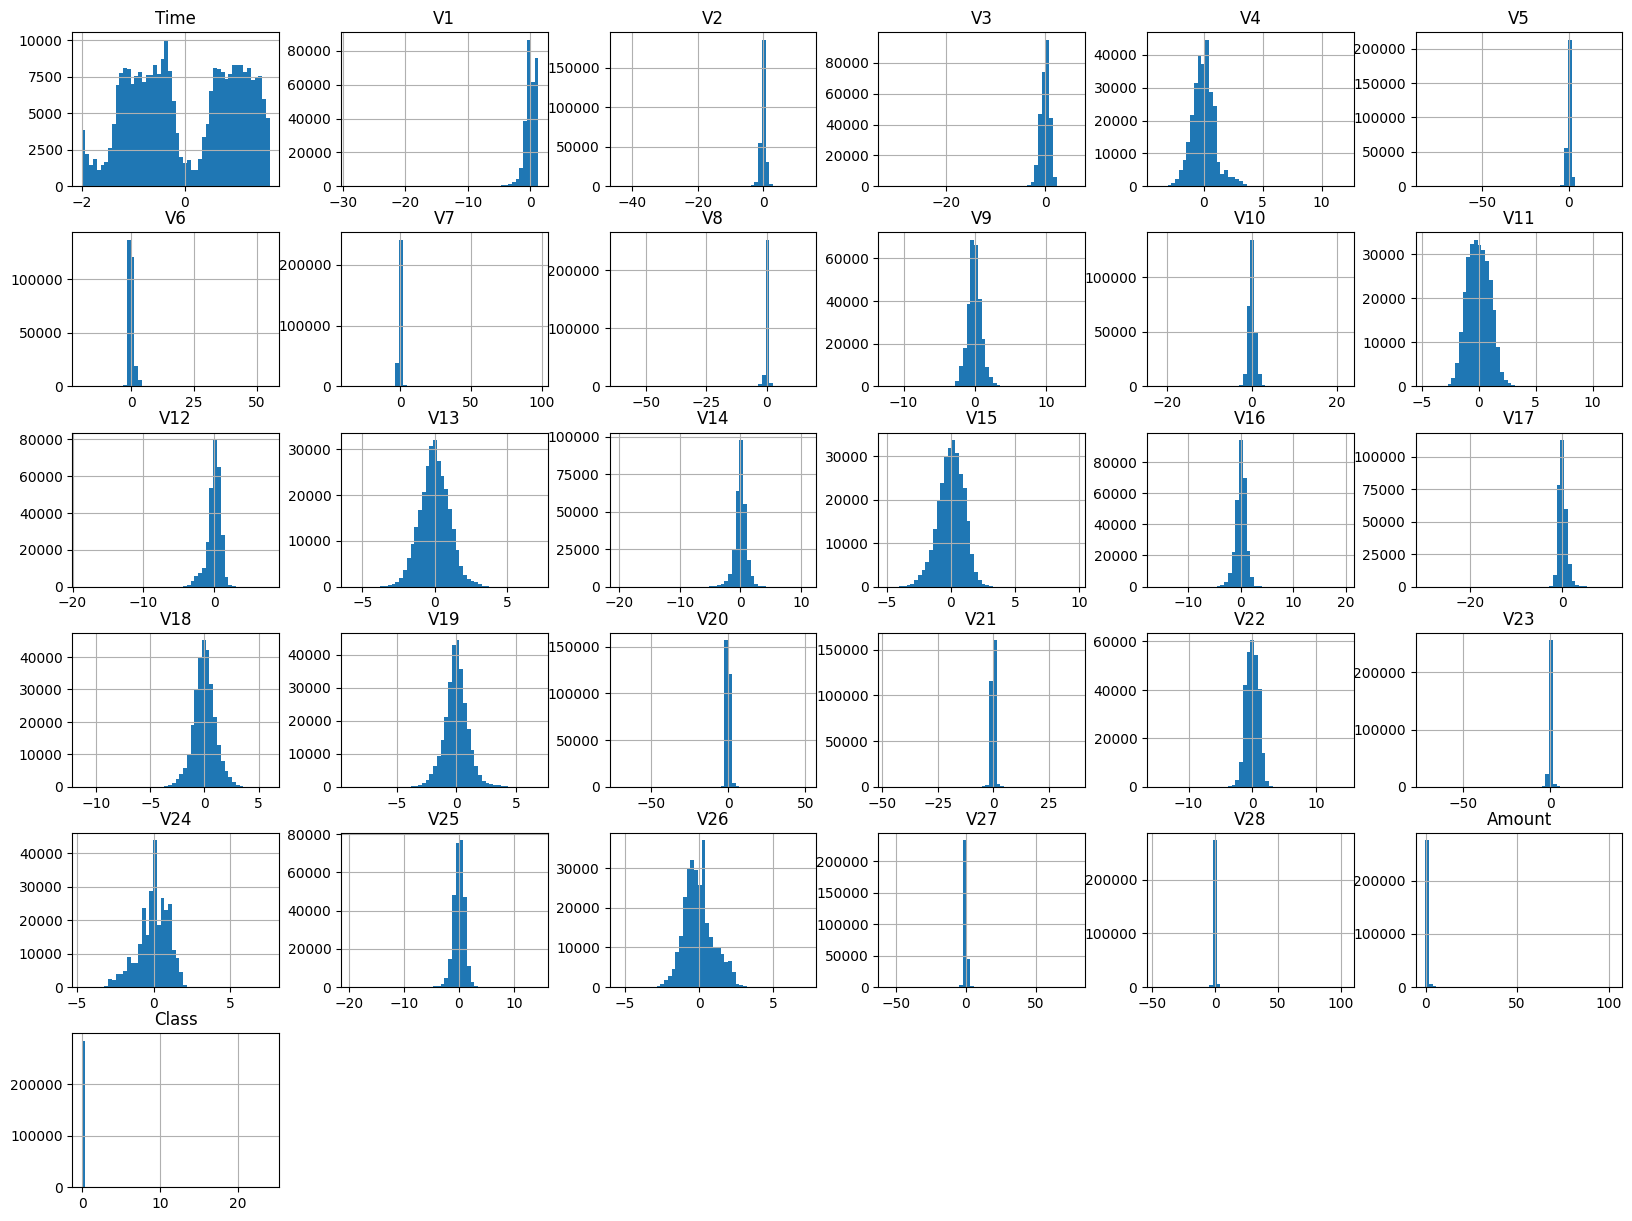

In [27]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [18]:
scaler = StandardScaler()
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [19]:
print(df.head)

<bound method NDFrame.head of             Time        V1        V2        V3        V4        V5        V6  \
0      -1.996583 -0.694242 -0.044075  1.672773  0.973366 -0.245117  0.347068   
1      -1.996583  0.608496  0.161176  0.109797  0.316523  0.043483 -0.061820   
2      -1.996562 -0.693500 -0.811578  1.169468  0.268231 -0.364572  1.351454   
3      -1.996562 -0.493325 -0.112169  1.182516 -0.609727 -0.007469  0.936150   
4      -1.996541 -0.591330  0.531541  1.021412  0.284655 -0.295015  0.071999   
...          ...       ...       ...       ...       ...       ...       ...   
284802  1.641931 -6.065842  6.099286 -6.486245 -1.459641 -3.886611 -1.956690   
284803  1.641952 -0.374121 -0.033356  1.342145 -0.521651  0.629040  0.794446   
284804  1.641974  0.980024 -0.182434 -2.143205 -0.393984  1.905833  2.275262   
284805  1.641974 -0.122755  0.321250  0.463320  0.487192 -0.273836  0.468155   
284806  1.642058 -0.272331 -0.114899  0.463866 -0.357570 -0.009089 -0.487602   

         

###Check the range of values after the normalization

In [20]:
# Check the range of values
print(df.mean())
print(df.std())

Time     -3.065637e-16
V1       -1.506872e-17
V2       -9.580116e-18
V3       -8.622104e-17
V4       -5.189230e-18
V5        3.832046e-17
V6        9.979288e-18
V7        1.237432e-17
V8       -3.193372e-18
V9        7.234983e-19
V10       5.588401e-18
V11      -4.311052e-17
V12       1.676520e-17
V13      -1.252401e-17
V14       2.594615e-17
V15      -2.075692e-17
V16       1.836189e-17
V17       3.392958e-18
V18       2.634532e-17
V19       4.365938e-18
V20      -1.247411e-18
V21      -3.642440e-18
V22       3.193372e-18
V23       8.781773e-18
V24       9.580116e-18
V25      -5.029561e-17
V26       5.887780e-18
V27       2.444925e-18
V28      -7.908585e-18
Amount    2.913952e-17
Class    -1.197515e-17
dtype: float64
Time      1.000002
V1        1.000002
V2        1.000002
V3        1.000002
V4        1.000002
V5        1.000002
V6        1.000002
V7        1.000002
V8        1.000002
V9        1.000002
V10       1.000002
V11       1.000002
V12       1.000002
V13       1.000002
V14   

In [21]:
# Check the range of values
print(df.min())
print(df.max())

Time      -1.996583
V1       -28.798555
V2       -44.035292
V3       -31.871733
V4        -4.013919
V5       -82.408097
V6       -19.636058
V7       -35.209396
V8       -61.302524
V9       -12.228015
V10      -22.581908
V11       -4.700128
V12      -18.698680
V13       -5.819392
V14      -20.044280
V15       -4.915191
V16      -16.125344
V17      -29.626452
V18      -11.332656
V19       -8.861402
V20      -70.691461
V21      -47.419067
V22      -15.065646
V23      -71.754464
V24       -4.683638
V25      -19.750332
V26       -5.401098
V27      -55.906596
V28      -46.746117
Amount    -0.353229
Class     -0.041599
dtype: float64
Time        1.642058
V1          1.253351
V2         13.357750
V3          6.187993
V4         11.918743
V5         25.214135
V6         55.020149
V7         97.478239
V8         16.751534
V9         14.194945
V10        21.807579
V11        11.775038
V12         7.854679
V13         7.160735
V14        10.981465
V15         9.699117
V16        19.760439
V17     

###Inspect Unique Values in the Target Column

In [22]:
# Get unique values in the 'Class' column
unique_values = df['Class'].unique()
print("Unique values in 'Class' column:", unique_values)

Unique values in 'Class' column: [-0.04159898 24.0390519 ]


###Count each unique value in the target column

In [29]:
# Get count of each unique value in the 'Class' column
value_counts = df['Class'].value_counts()
print("Value counts in 'Class' column:\n", value_counts)


Value counts in 'Class' column:
 -0.041599     284315
 24.039052       492
Name: Class, dtype: int64


### ***Handle Class Imbalance***:

***a. Split the Dataset:***

In [24]:
X = df.drop('Class', axis=1)  # Assuming 'Class' is the target column
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***b. Apply Resampling Techniques:***

Use Resampling Techniques:
Fraud cases are often much less common than other types of transactions. To address this imbalance, you can use methods like SMOTE (Synthetic Minority Over-sampling Technique), which creates more examples of the rare fraud cases to make the dataset more balanced.

In [ ]:

# # Initialize RandomOverSampler
# ros = RandomOverSampler(random_state=42)

# # Apply RandomOverSampler to balance classes
# X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
